
# Classification of MNIST Data using MLP

In this session, we'll construct a Multi-layered Artificial Neural Network using Python and the MNIST Dataset. MNIST is a large database of handwritten digits frequently employed to train diverse image processing approaches.
                     
This program learns how to recognize handwritten digits using stochastic gradient descent and the MNIST training data, employing neural network libraries.


In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt


In [2]:
numClasses = 10
numFeatures = 784
lr = 0.005

# **Step 1: Import the Dataset and split into Train and Test sets**

In [3]:
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32) # uint8
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape,yTrain.shape, xTest.shape)
label = tf.one_hot(yTrain, numClasses)
print(label.shape)

(60000, 28, 28) (60000,) (10000, 28, 28)
(60000, 10)


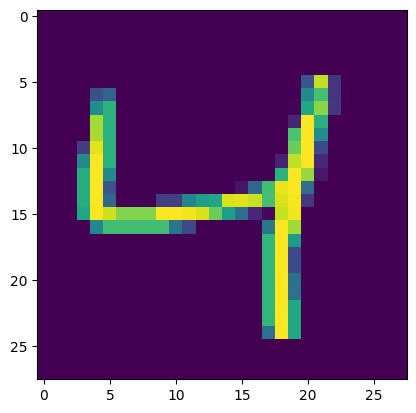

In [4]:
plt.imshow(xTrain[2,:,:])

# Step 2: Define Model

In [5]:
layers = []
layers.append(tf.keras.layers.Flatten(input_shape=(28, 28))) # Input
layers.append(tf.keras.layers.Dense(40)) # Hidden
layers.append(tf.keras.layers.Dense(10)) # Output
layers.append(tf.keras.layers.Softmax()) # Softmax
model = Sequential(layers)

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 40)                  │          31,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,810 (124.26 KB)

 Trainable params: 31,810 (124.26 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Configure Model

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=['accuracy'],
)


# Step 4: Training

In [13]:
history = model.fit(xTrain, label, epochs=10, batch_size = 70, validation_split=0.1)

Epoch 1/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9221 - loss: 0.0142 - val_accuracy: 0.9370 - val_loss: 0.0114
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9228 - loss: 0.0142 - val_accuracy: 0.9357 - val_loss: 0.0116
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9223 - loss: 0.0142 - val_accuracy: 0.9317 - val_loss: 0.0123
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9241 - loss: 0.0140 - val_accuracy: 0.9285 - val_loss: 0.0130
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9224 - loss: 0.0144 - val_accuracy: 0.9322 - val_loss: 0.0124
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9238 - loss: 0.0141 - val_accuracy: 0.9338 - val_loss: 0.0120
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9233 - loss: 0.0142 - val_accuracy: 0.9305 - val_loss: 0.0129
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9244 - loss: 0.0140 - val_accuracy: 0.

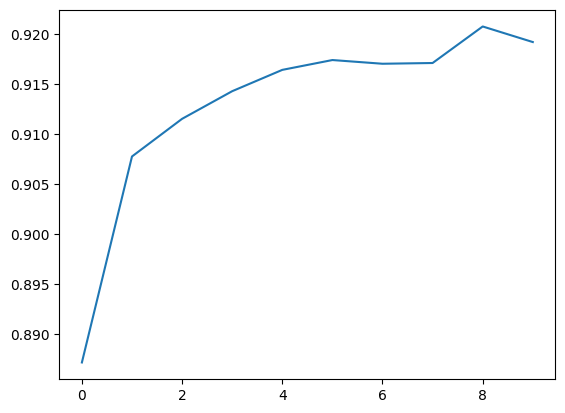

In [9]:

plt.plot(history.history['accuracy'])

# Step 5: Testing (Prediction)

In [10]:
predY = model.predict(xTest)
classLabel = tf.argmax(predY, 1)
print(classLabel.shape)
print(predY.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
(10000, 10)


# Optional code
# View the prediction after reshaping the flatten images


In [11]:
xTestImg = np.reshape(xTest, [-1,28,28])

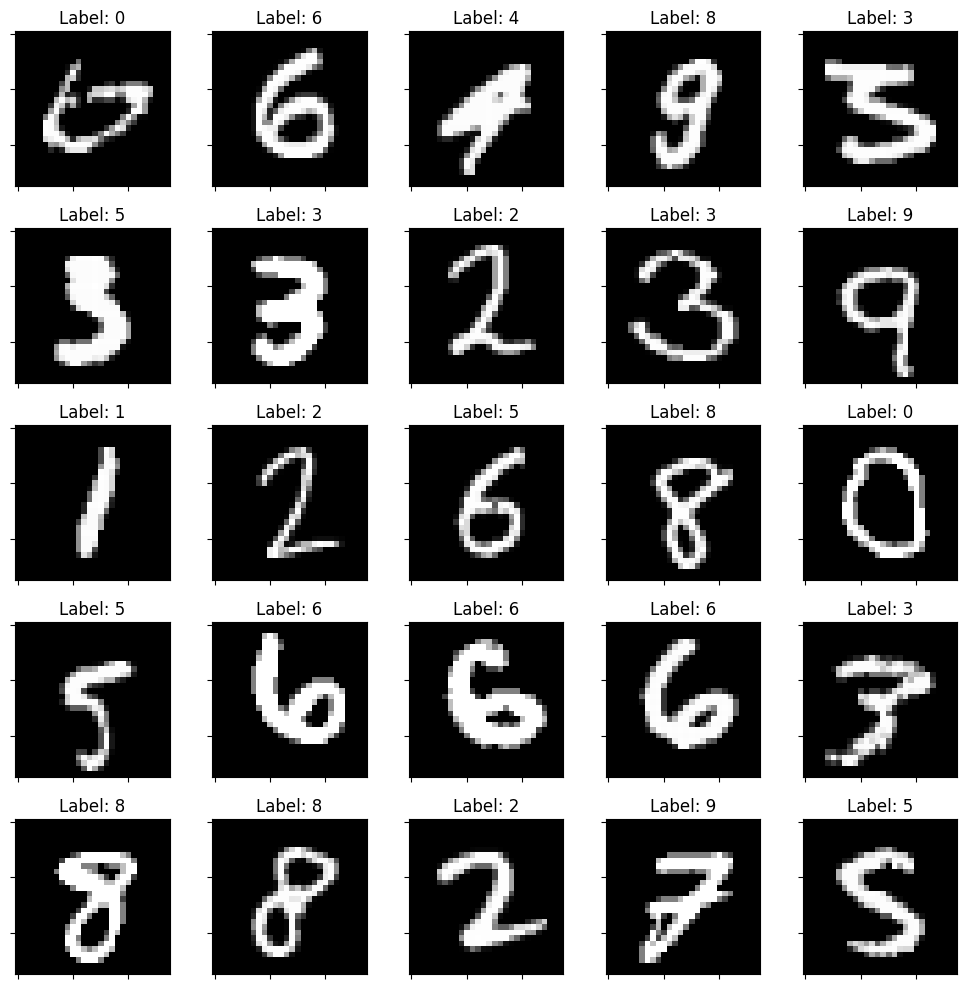

In [12]:
startIndex = 445
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.tight_layout()
plt.show()